In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("./BostonHousing.csv")
data.nunique()

crim       504
zn          26
indus       76
chas         2
nox         81
rm         446
age        356
dis        412
rad          9
tax         66
ptratio     46
b          357
lstat      455
medv       229
dtype: int64

In [4]:
columns_to_exclude = ['chas']
for col in data.columns:
    if col not in columns_to_exclude:
        min_val = data[col].min()
        max_val = data[col].max()
        data[col] = (data[col] - min_val) / (max_val - min_val)
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.000000,0.18,0.067815,0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,0.422222
1,0.000236,0.00,0.242302,0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,0.368889
2,0.000236,0.00,0.242302,0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,0.660000
3,0.000293,0.00,0.063050,0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,0.631111
4,0.000705,0.00,0.063050,0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,0.693333


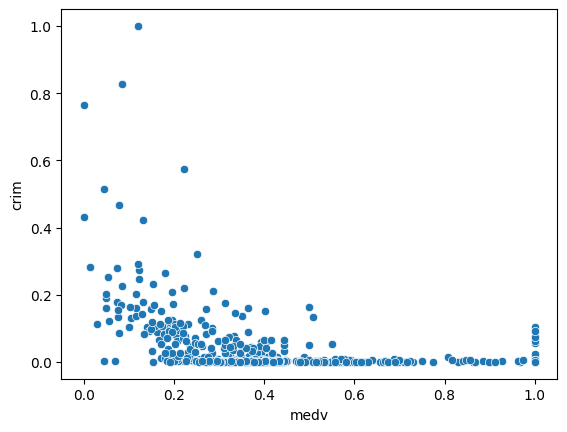

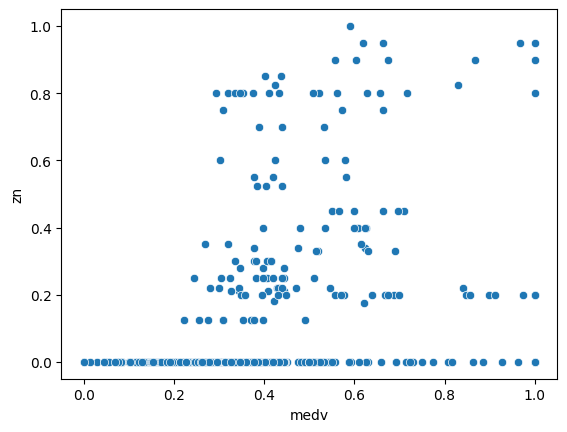

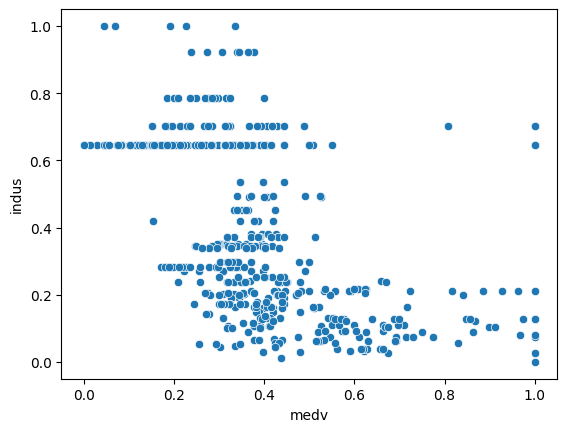

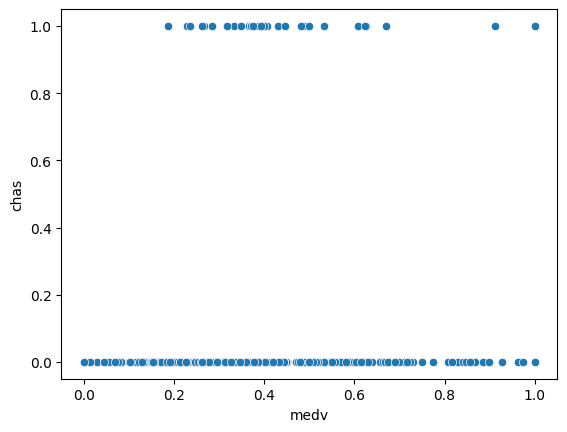

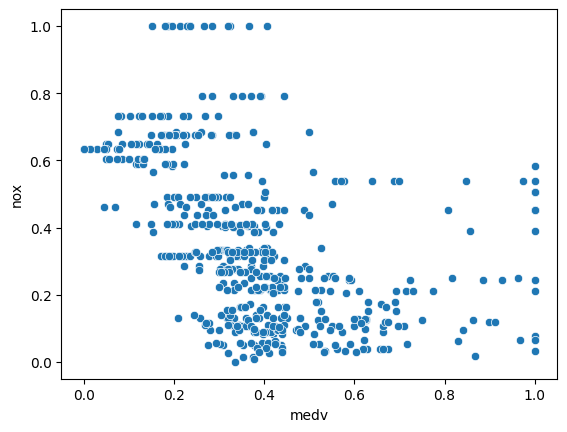

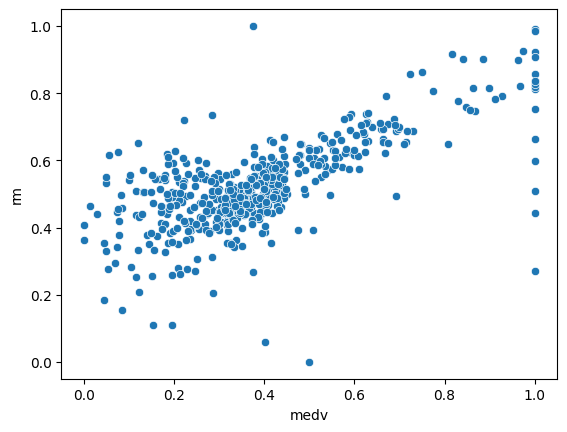

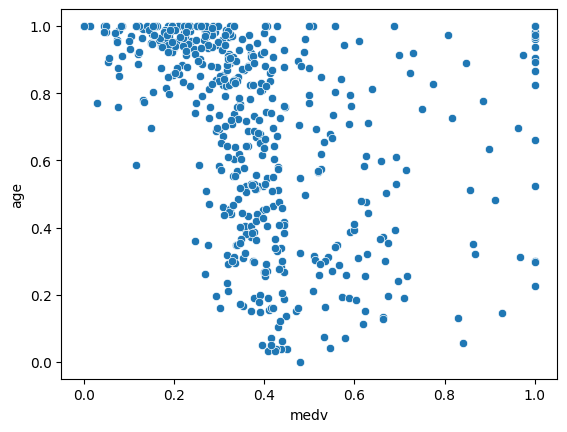

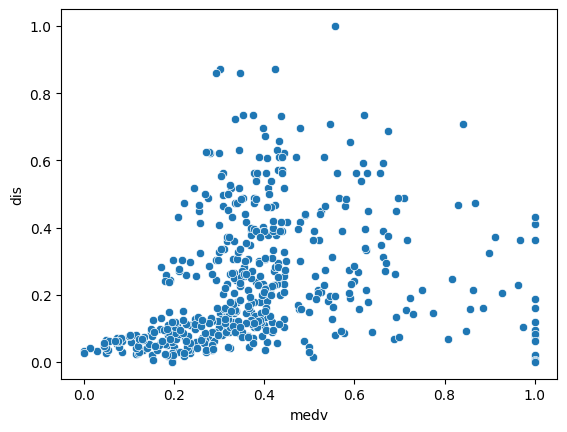

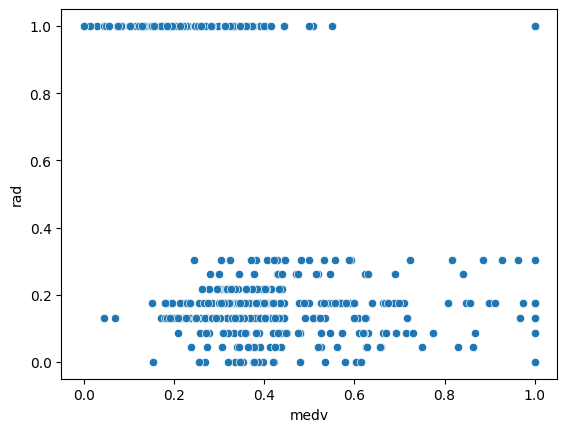

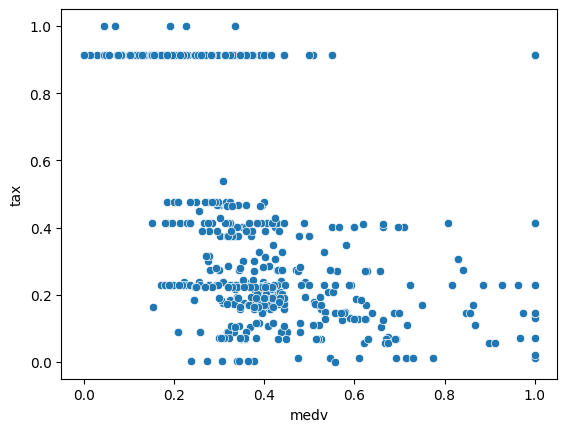

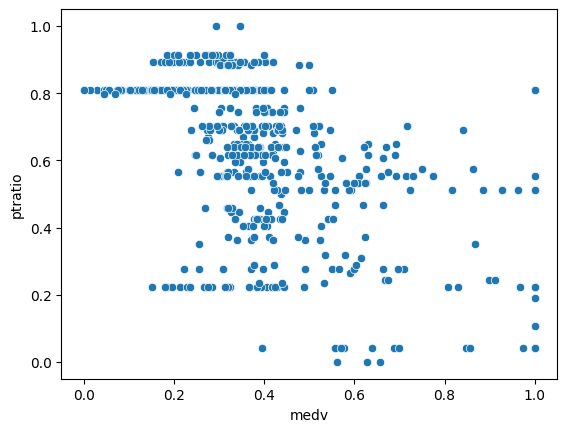

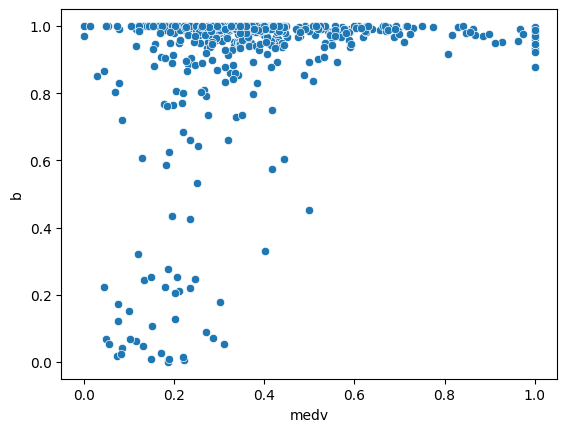

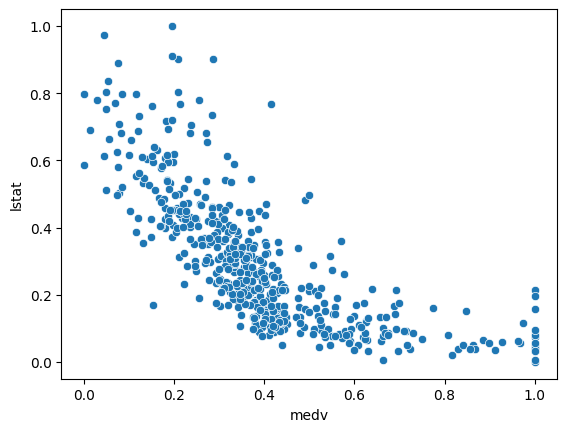

In [5]:
for col in data.columns:
    if col != "medv":
        sns.scatterplot(x="medv", y=col, data=data)
        plt.show()

<Axes: >

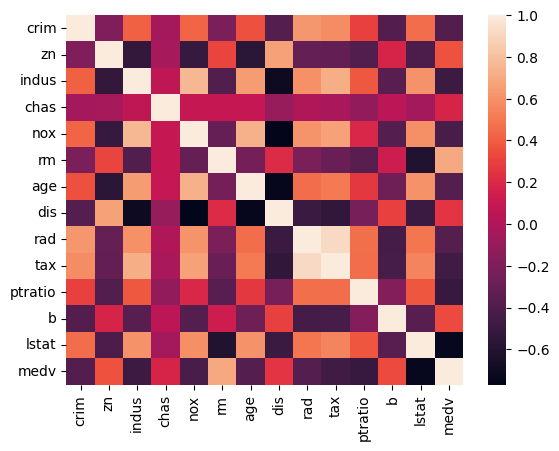

In [4]:
sns.heatmap(data.corr())

In [5]:
# method to combine two cols
def combine_columns(col1, col2, data):
    data[col1 + '_' + col2] = (data[col1] + data[col2]) / 2
    data = data.drop(columns=[col1, col2])
    cols = [col for col in data.columns if col != "medv"] + ["medv"]    # pushes "medv" in the end
    data = data[cols]
    return data

def combine_columns_multiple(cols, data):
    new_col = '_'.join(cols)
    data[new_col] = data[cols].mean(axis=1)
    data = data.drop(columns=cols)    
    if 'medv' in data.columns:
        cols_order = [col for col in data.columns if col != 'medv'] + ['medv']
        data = data[cols_order]
    return data

In [6]:
data = combine_columns("tax", "rad", data)
data = combine_columns("indus", "nox", data)

In [7]:
data = combine_columns("dis", "b", data)

In [8]:
data = combine_columns("zn", "rm", data)

In [9]:
data = combine_columns("dis_b", "zn_rm", data)

<Axes: >

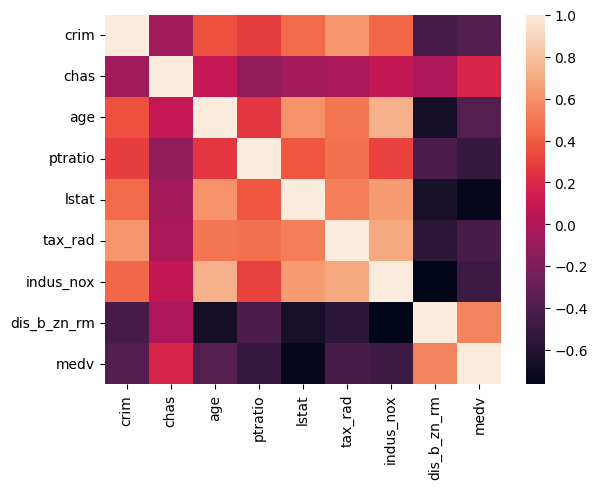

In [10]:
sns.heatmap(data.corr())

In [11]:
data = combine_columns_multiple(['age', 'ptratio', 'lstat', 'tax_rad', 'indus_nox'], data)

<Axes: xlabel='dis_b_zn_rm', ylabel='age_ptratio_lstat_tax_rad_indus_nox'>

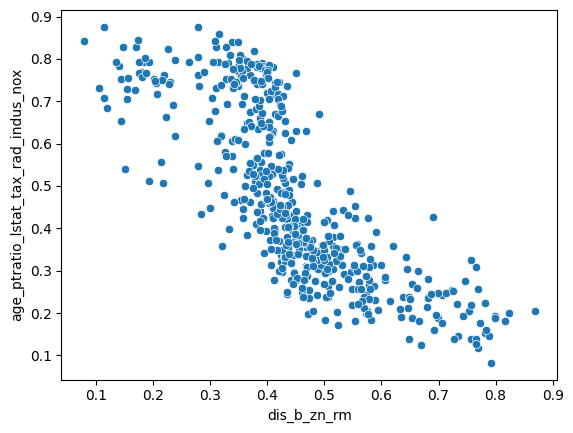

In [13]:
sns.scatterplot(data=data, x='dis_b_zn_rm', y='age_ptratio_lstat_tax_rad_indus')

<Axes: xlabel='medv', ylabel='age_ptratio_lstat_tax_rad_indus_nox'>

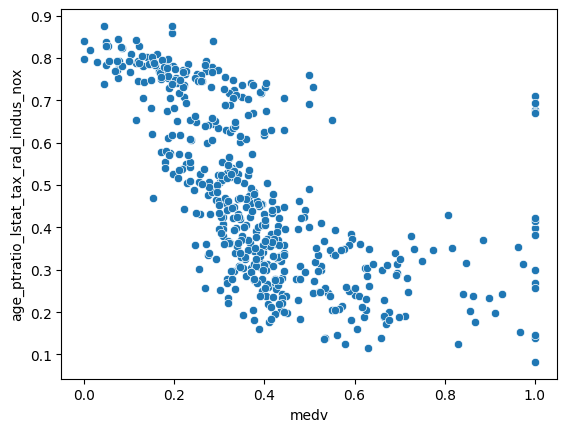

In [14]:
sns.scatterplot(data=data, x='medv', y='age_ptratio_lstat_tax_rad_indus_nox')

<Axes: xlabel='dis_b_zn_rm', ylabel='crim'>

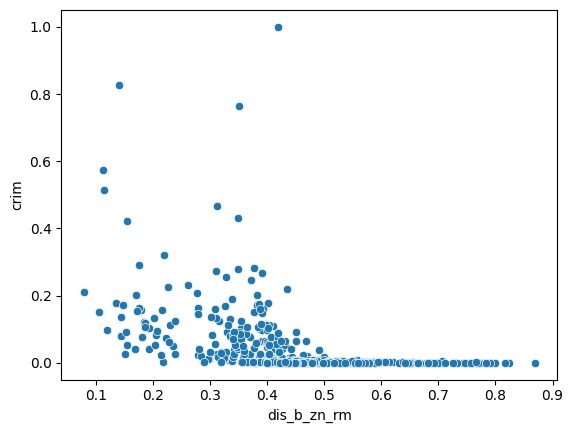

In [15]:
sns.scatterplot(data=data, x='dis_b_zn_rm', y='crim')

In [16]:
data = combine_columns('age_ptratio_lstat_tax_rad_indus_nox', 'crim', data)

<Axes: >

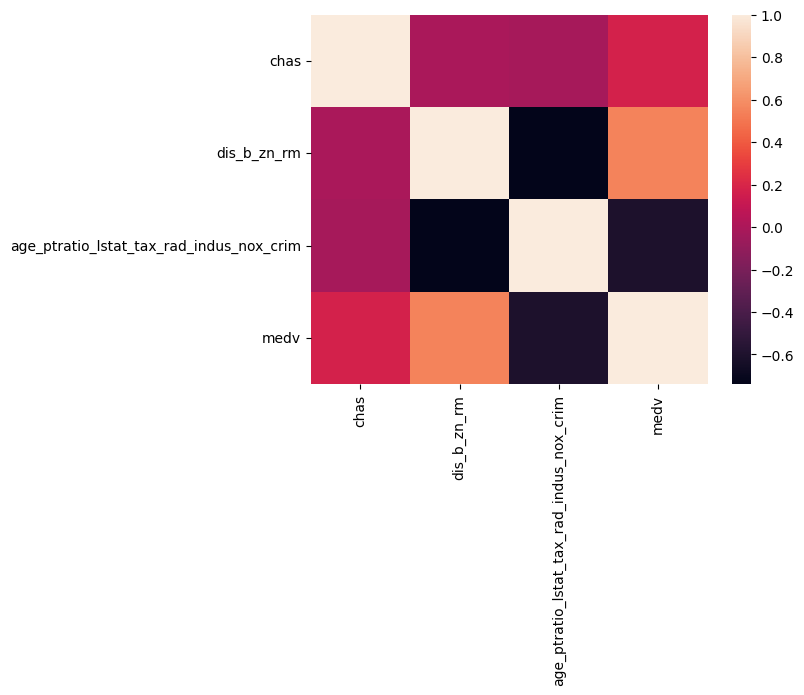

In [17]:
sns.heatmap(data.corr())

<Axes: xlabel='age_ptratio_lstat_tax_rad_indus_nox_crim', ylabel='medv'>

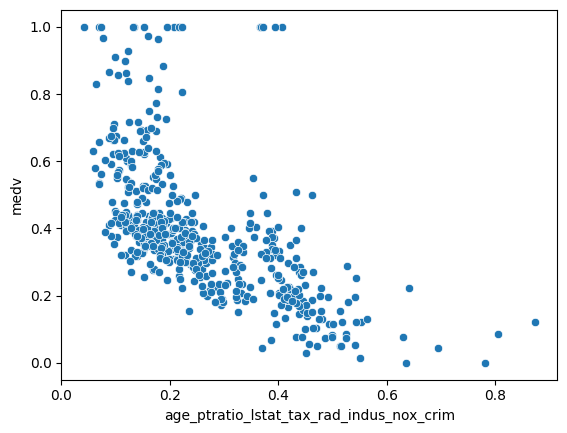

In [18]:
sns.scatterplot(data=data, x='age_ptratio_lstat_tax_rad_indus_nox_crim', y='medv')

<Axes: xlabel='age_ptratio_lstat_tax_rad_indus_nox_crim', ylabel='dis_b_zn_rm'>

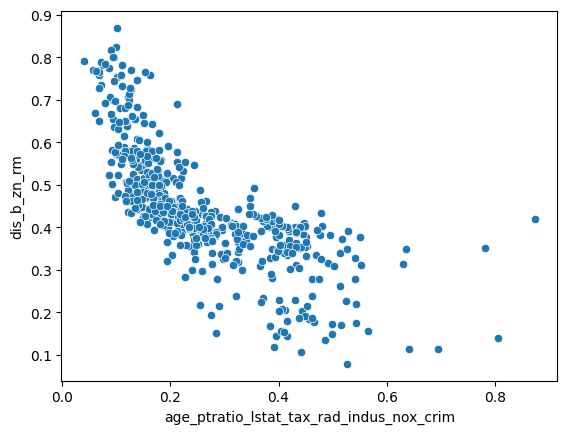

In [19]:
sns.scatterplot(data=data, x='age_ptratio_lstat_tax_rad_indus_nox_crim', y='dis_b_zn_rm')

<Axes: xlabel='dis_b_zn_rm', ylabel='medv'>

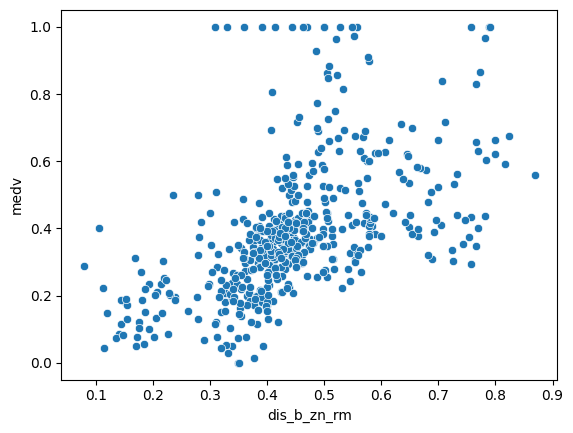

In [20]:
sns.scatterplot(data=data, x='dis_b_zn_rm', y='medv')